In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive"

/content/drive/MyDrive


# Imports

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import tensorflow as tf

#keras es el "front-end" de tensorflow
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Data Augmentation


usamos ImageDataGenerator para generar imágenes nuevas, modificando las que ya tenemos en nuestro set de entrenamiento. Las mantenemos en el ram mientras entrenamos, para no desperdiciar espacio en el Drive

In [5]:
base_dir = 'AI/LEGO_v1'
train_dir = os.path.join(base_dir,'train')
#train_dir = 'train_data'
test_dir = os.path.join(base_dir, 'test')
#test_dir = 'test_data'

train_datagen = ImageDataGenerator(
		 					# hay que tomar en cuenta la semántica y naturaleza del problema a solucionar, para elegir los parámetros que se pueden modificar (y los que no)

		 					# Optimación numérica
							rescale = 1./255,
							# Función que "mueve" la imagen a los lados
							width_shift_range = 0.2,
							 # Función que "mueve" la imagen a lo alto
							height_shift_range = 0.2,
						  # Alargar la imagen
							shear_range = 0.3,
							zoom_range = 0.3)

En este caso tomamos 30 imágenes (10% de cada categoría), y estamos mostrando como se generarían 5 imágenes diferentes modificando la original. Mantenemos su tamaño original (640x480)

Found 5109 images belonging to 16 classes.


<Figure size 640x480 with 0 Axes>

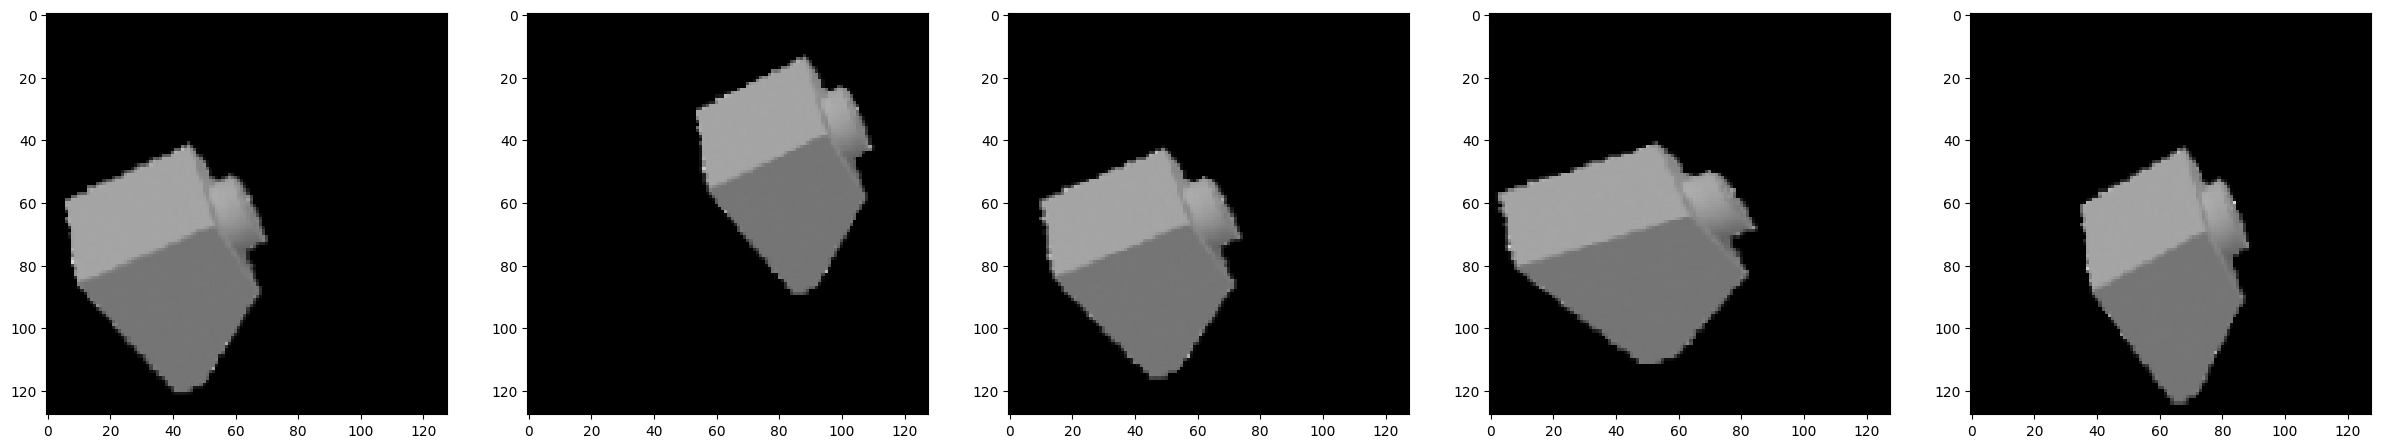

In [6]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							# estandariza el tamaño de las imágenes que se van generando
							target_size = (128, 128),
							batch_size = 64,
							class_mode ='categorical',
							)


plt.figure()
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
	axarr[i].imshow(train_generator[0][0][0])

# Red Neuronal Convolutiva

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(3, (20, 20), activation="relu", input_shape = (128,128,3)))
model.add(layers.Conv2D(5, (10, 10), activation="relu"))
model.add(layers.Conv2D(8, (8, 8), activation="relu"))
model.add(layers.Conv2D(10, (5, 5), activation="relu"))
model.add(layers.Conv2D(20, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
#16 neuronas, 1 por cada categoría
model.add(layers.Dense(16,activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer='adam',
						metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 109, 109, 3)       3603      
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 5)       1505      
                                                                 
 conv2d_7 (Conv2D)           (None, 93, 93, 8)         2568      
                                                                 
 conv2d_8 (Conv2D)           (None, 89, 89, 10)        2010      
                                                                 
 conv2d_9 (Conv2D)           (None, 87, 87, 20)        1820      
                                                                 
 flatten_1 (Flatten)         (None, 151380)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [13]:
from keras.callbacks import ModelCheckpoint
checkpoint_filepath = 'model_checkpoint.keras'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='acc',
    mode='max',
    save_best_only=True)

In [14]:
history = model.fit(
	train_generator,
	epochs = 30,
	callbacks=[checkpoint_callback]
	)


acc = history.history['acc']
loss = history.history['loss']

model.save('v1.keras')

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

Epoch 1/30
80/80 [==============================] - 692s 9s/step - loss: 2.1565 - acc: 0.2269
Epoch 2/30
80/80 [==============================] - 734s 9s/step - loss: 2.0924 - acc: 0.2562
Epoch 3/30
80/80 [==============================] - 699s 9s/step - loss: 2.0374 - acc: 0.2674
Epoch 4/30
80/80 [==============================] - 702s 9s/step - loss: 1.9550 - acc: 0.2848
Epoch 5/30
80/80 [==============================] - 699s 9s/step - loss: 1.9113 - acc: 0.3012
Epoch 6/30
80/80 [==============================] - 704s 9s/step - loss: 1.8624 - acc: 0.3114
Epoch 7/30
80/80 [==============================] - 698s 9s/step - loss: 1.7889 - acc: 0.3402
Epoch 8/30
80/80 [==============================] - 704s 9s/step - loss: 1.8072 - acc: 0.3443
Epoch 9/30
80/80 [==============================] - 699s 9s/step - loss: 1.7609 - acc: 0.3416
Epoch 10/30
80/80 [==============================] - 697s 9s/step - loss: 1.7581 - acc: 0.3449
Epoch 11/30
20/80 [======>.......................] - ETA: 8

KeyboardInterrupt: 

In [16]:
model = models.load_model('model_checkpoint.keras')

In [17]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (128, 128),
					#10% del set de pruebas
					batch_size = 128,
					class_mode= 'categorical')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)


Found 1280 images belonging to 16 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


10/25 [===========>..................] - ETA: 8:18 - loss: 1039.7024 - acc: 0.0984

25/25 [==============================] - 305s 12s/step - loss: 1039.7024 - acc: 0.0984

test acc :
 0.09843750298023224


# Métricas

*Explicación*

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#test_imgs = test_generator[0][0]
#test_labels = test_generator.classes

#print(test_imgs)

#predictions = model.predict(test_imgs)
#classes_x = np.argmax(predictions,axis=1)
#classes_x



test_imgs, test_labels = test_generator.next()

predictions = model.predict(test_imgs)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = np.argmax(test_labels, axis=1)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


4/4 [==============================] - 3s 645ms/step


In [52]:
print(predicted_classes)
print(true_classes)

[ 6  4 14  4  2 14 14 14 14  1  6 14 14  4 14 14  6 14 14 14 14 14 14 10
 14  6  6  4 14 14  6  6 14  6  6 14  6 14 10 14 14 14  6 14  6  6 14 14
  6 14 14 14 14  6  6 14  6 14 14 14  4 14  4  6 14 14 14 14 14  6 14 14
 14 14  4  6 14 14 14 14  6 14 14  6  4  6 14 14 14  6 14 14  4  6 14 14
  6 14 14 14 14  6 14 14  4  6 14 14  6 14  6  6 14 14  4 14  6 14  4 14
 14 14 14 14 14 14 14 14]
[ 0  1 14 14  3 13 10 14  6  1  1  7  5  0 13  6 14 14  4 14 13  8 14  8
 12 15  6  0  4  6  2  2  9  4  3 14  0  8 11  6 13  9  6  7  2  9 10  8
  6 11 13 10  5  0 10  8  3  8  8  1  0  9 10  4  9  7  9  4 10  6  8  6
  8  8 15 15  9  7  8  5 15  5 12  0  0  3  9  9 11 15  6 15 15  1 11 10
  2  8  7 14 13  1  8  8 12  1 12 15  1 10 15  1  7 10  4 14  6  6 15  5
  0  9  4  8 14  8  9 12]


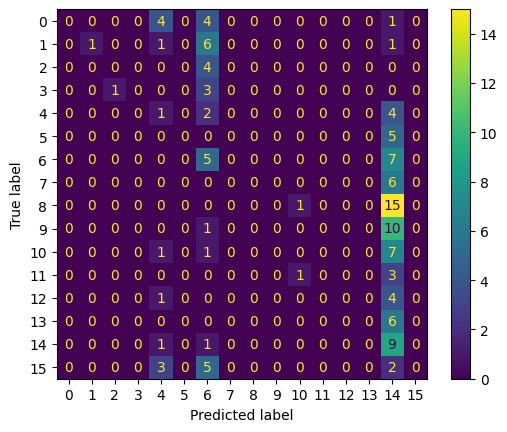

In [54]:
cm = confusion_matrix(true_classes, predicted_classes)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

plt.show()
